In [1]:
from pathlib import Path
import networkx as nx
from collections import defaultdict
from collections import Counter
from tqdm import tqdm
import pickle as pk
import numpy as np
import pandas as pd
from datetime import datetime as dt
from geopy.distance import great_circle
import matplotlib.pyplot as plt
from random import sample
from random import choices
import seaborn as sns
import bisect
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
import homophily_functions as fn
import importlib
importlib.reload(fn)
%matplotlib inline

In [3]:
G = pk.load(open("/home/quint/twitter_network/Pickles/follower_graph.pk", "rb"))  

In [7]:
H = pk.load(open("/home/quint/twitter_network/Pickles/follower_graph_reciprocal.pk", "rb"))  

## Create row-normalized Bivariate plots for directed network

In [8]:
def gen_all_heatmaps(table, table_rec, variable, col_names=False, size=(9,6), font_scale=1.5, annotate=True,
                     ticks='auto', show = False):
    
    fn.genreate_heatmaps(variable, table, size=size, norm="Row", col_names=col_names, 
                      file_name='Plots/Bivariate/'+variable+'_rownorm.png', title=False, font_scale=font_scale,
                     annotate=annotate, xticklabels=ticks, yticklabels=ticks, show = show)
    fn.genreate_heatmaps(variable, table, size=size, norm=False, col_names=col_names, 
                      file_name='Plots/Bivariate/'+variable+'.png', title=False, font_scale=font_scale,
                     annotate=annotate, xticklabels=ticks, yticklabels=ticks, show = show)

    #reciprocal
    fn.genreate_heatmaps(variable, table_rec, size=size, norm="Row", col_names=col_names, is_reciprocal=True, 
                      file_name='Plots/Bivariate/'+variable+'_reciprocal_rownorm.png', title=False, font_scale=font_scale,
                     annotate=annotate, xticklabels=ticks, yticklabels=ticks, show = show)
    fn.genreate_heatmaps(variable, table_rec, size=size, norm=False, col_names=col_names, is_reciprocal=True, 
                      file_name='Plots/Bivariate/'+variable+'_reciprocal.png', title=False, font_scale=font_scale,
                     annotate=annotate, xticklabels=ticks, yticklabels=ticks, show = show)



In [10]:
plt.ioff()
variable = "race"
col_names=['Caucasian','Hispanic','African-American','Asian','Other' ]
race = fn.get_table(fn.diadic_density(variable, G)[0])
race_rec = fn.get_table(fn.diadic_density(variable, H, reciprocal=True)[0], reciprocal = True)
gen_all_heatmaps(race, race_rec, variable, col_names, (10,7), show = False)

100%|███████████████████████████████████████████████████████████████████████████████| 3839400/3839400 [00:13<00:00, 280775.43it/s]


In [11]:
# Filter network by VRA states
# Alabama, Georgia, Louisiana, Mississippi, South Carolina, Virginia, Alaska, Arizona, Texas, plus North Carolina
states = {'AL', 'GA', 'LA', 'MS', 'SC', 'VA', 'AK', 'AZ','TX', 'NC'}
state_nodes = [n[0] for n in G.nodes('state') if n[1] in states]
print(len(state_nodes))

variable = "race_vra"
col_names=['Caucasian','Hispanic','African-American','Asian','Other']

sub_graph = G.subgraph(state_nodes).copy()
race_vra = fn.get_table(fn.diadic_density("race", sub_graph)[0])

sub_graph2 = H.subgraph(state_nodes).copy()
race_vra_rec = fn.get_table(fn.diadic_density("race", sub_graph2, reciprocal=True)[0], reciprocal = True)

gen_all_heatmaps(race_vra, race_vra_rec, variable, col_names, (10,7))

230395


100%|█████████████████████████████████████████████████████████████████████████████████| 357560/357560 [00:01<00:00, 278886.83it/s]


In [12]:
variable = "party_id"
col_names=['Democrat','Independent','Republican' ]
party = fn.get_table(fn.diadic_density(variable, G)[0])
party_rec = fn.get_table(fn.diadic_density(variable, H, reciprocal=True)[0], reciprocal = True)
gen_all_heatmaps(party, party_rec, variable, col_names)

100%|███████████████████████████████████████████████████████████████████████████████| 3839400/3839400 [00:13<00:00, 291241.52it/s]


In [13]:
variable = "party_reg"
col_names=['Democrat','Independent','Republican']
party_reg = fn.get_table(fn.diadic_density(variable, G)[0])
party_reg_rec = fn.get_table(fn.diadic_density(variable, H, reciprocal=True)[0], reciprocal = True)
gen_all_heatmaps(party_reg, party_reg_rec, variable, col_names)

100%|███████████████████████████████████████████████████████████████████████████████| 1794637/1794637 [00:06<00:00, 266816.30it/s]


In [14]:
variable = "party_score_bin"
lims = np.linspace(0,100,21)
lims_lab = [str(int(x))+"-"+str(int(x)+5) for x in lims[0:(len(lims)-1)]]

col_names= lims_lab
ticks = ['0-5'] + ['']*4 + ['25-30'] + ['']*4 + ['50-55'] + ['']*4 + ['75-80'] + ['']*3 + ['95-100']

party_score = fn.get_table(fn.diadic_density(variable, G)[0])
party_score_rec = fn.get_table(fn.diadic_density(variable, H, reciprocal=True)[0], reciprocal = True)
gen_all_heatmaps(party_score, party_score_rec, variable, col_names, (12,8), annotate = False, ticks = ticks)

100%|███████████████████████████████████████████████████████████████████████████████| 3836629/3836629 [00:13<00:00, 284127.93it/s]


In [15]:
variable = "gender"
col_names=['Male','Female' ]
gender = fn.get_table(fn.diadic_density(variable, G)[0])
gender_rec = fn.get_table(fn.diadic_density(variable, H, reciprocal=True)[0], reciprocal = True)
gen_all_heatmaps(gender, gender_rec, variable, col_names)

100%|███████████████████████████████████████████████████████████████████████████████| 3839400/3839400 [00:13<00:00, 276813.13it/s]
/home/quint/twitter_network/Soc science paper/homophily_functions.py:274: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1, figsize = size)


In [16]:
variable = "binned_age_2"
col_names= ['21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60',
           '61-65','66-70','71-75','76-80','81-85']
ticks = ['21-25',' ',' ','36-40',' ',' ','51-55',' ',
           ' ','66-70',' ',' ','81-85']
age = fn.get_table(fn.diadic_density(variable, G)[0])
age_rec = fn.get_table(fn.diadic_density(variable, H, reciprocal=True)[0], reciprocal = True)
gen_all_heatmaps(age, age_rec, variable, col_names, (12,8), annotate = False, ticks = ticks)

100%|███████████████████████████████████████████████████████████████████████████████| 3796783/3796783 [00:13<00:00, 285576.27it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 3796300/3796300 [00:12<00:00, 295971.17it/s]


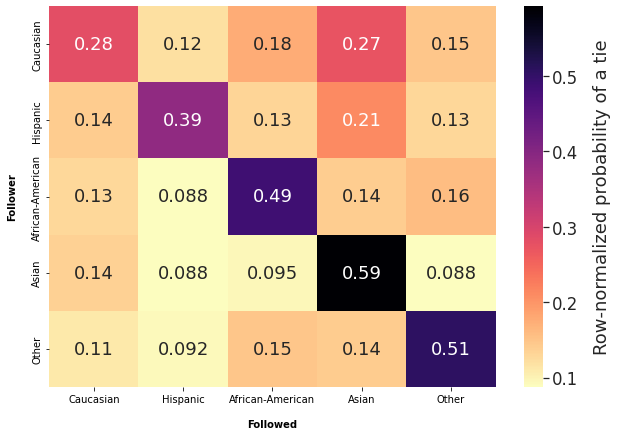

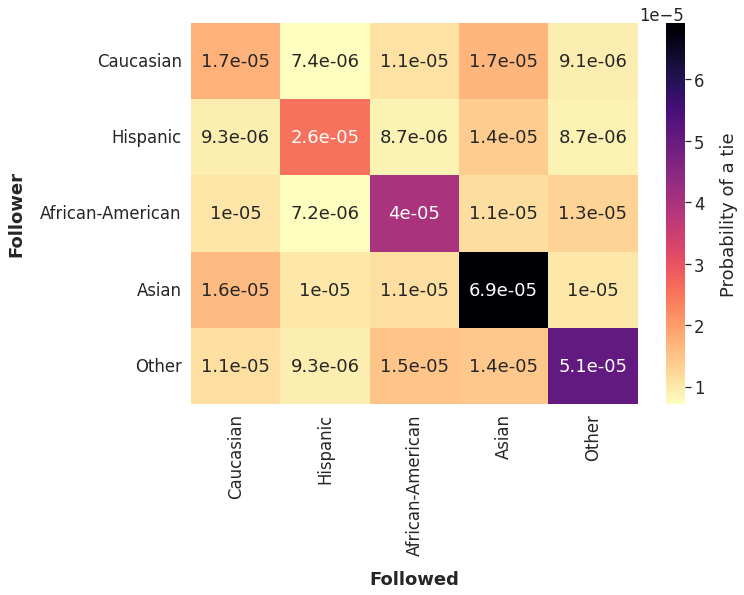

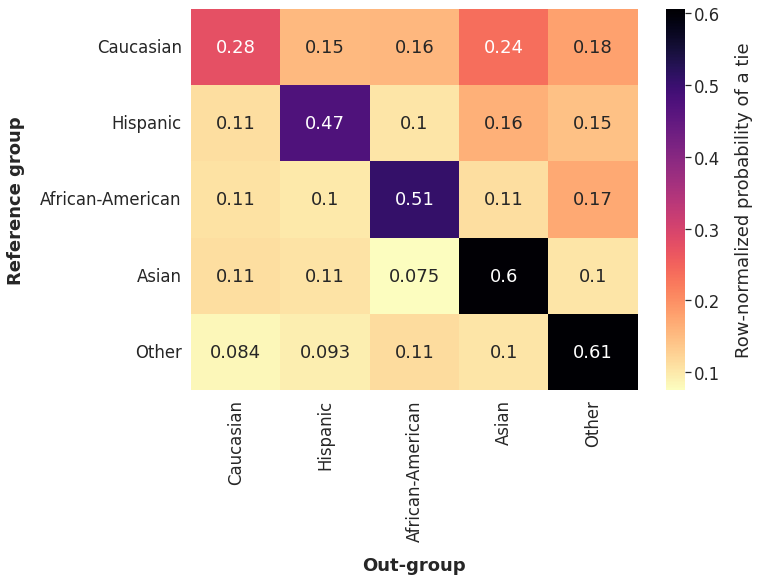

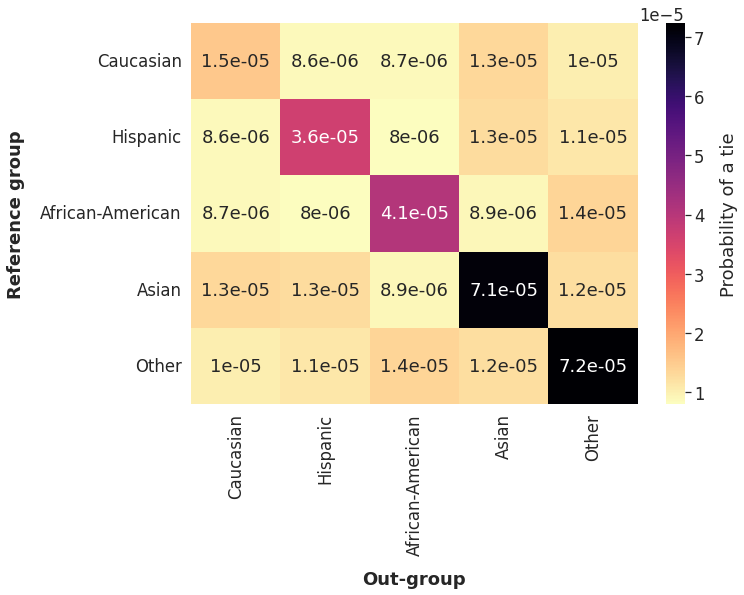

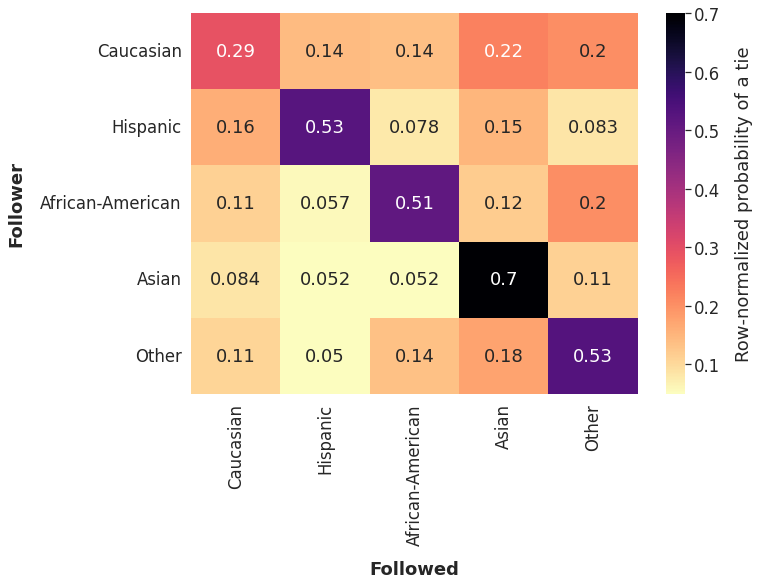

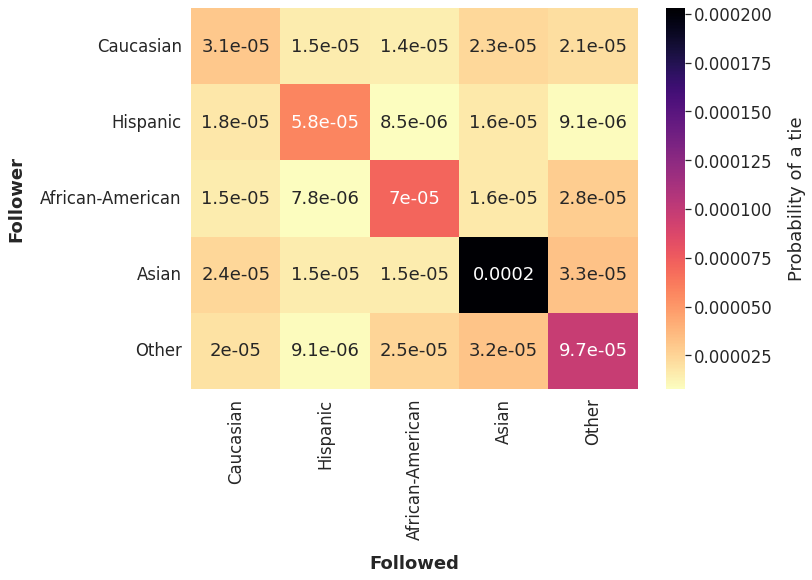

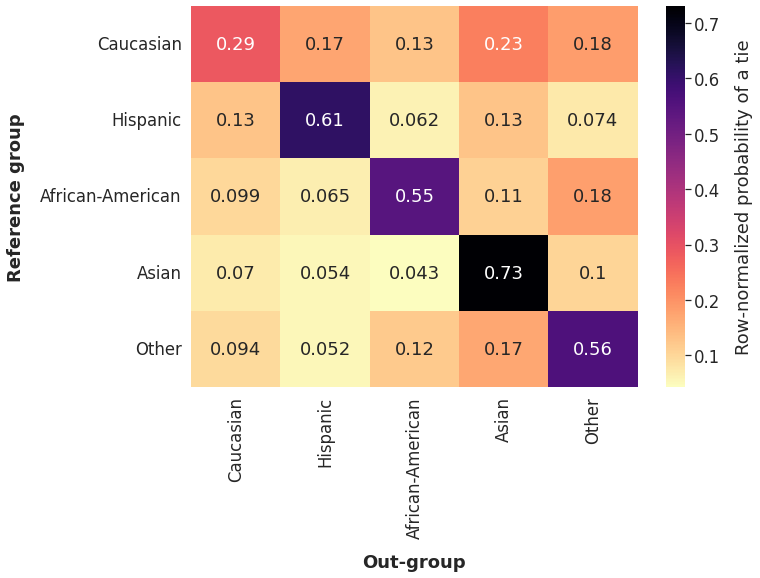

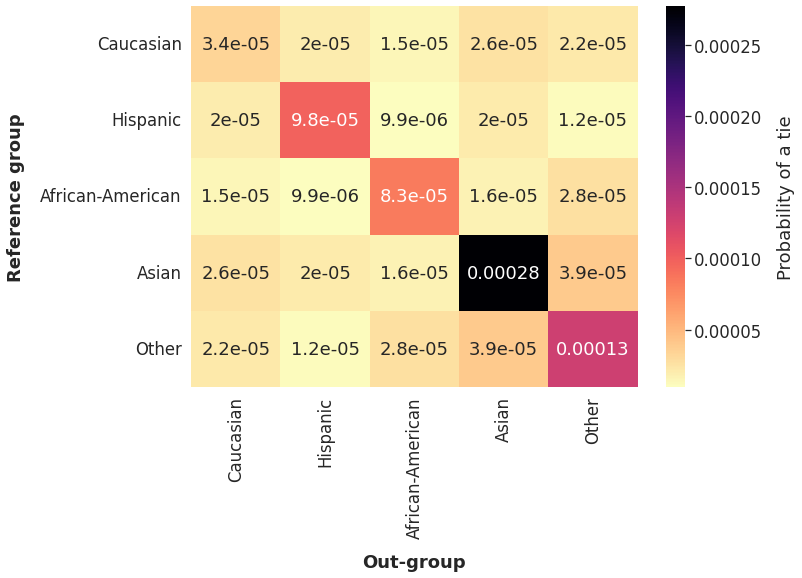

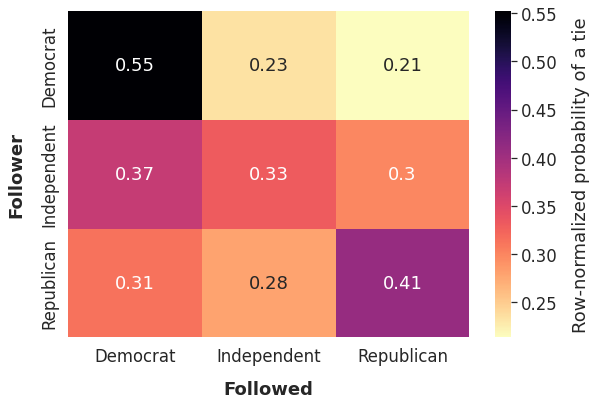

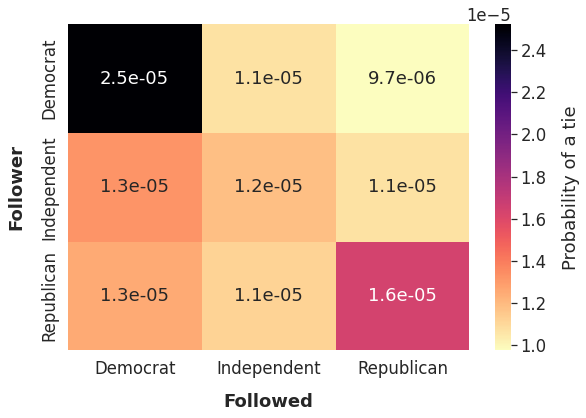

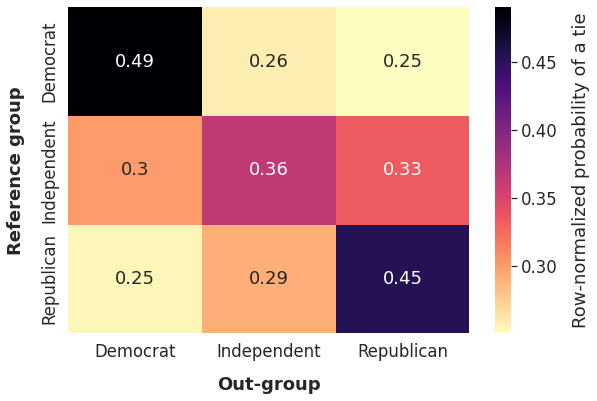

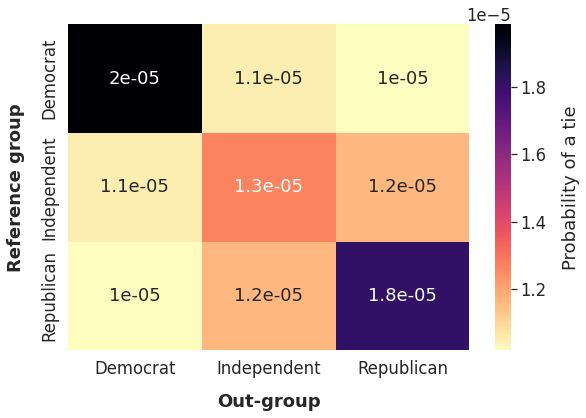

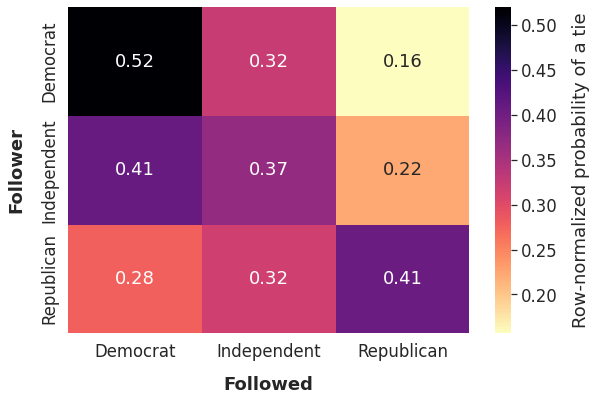

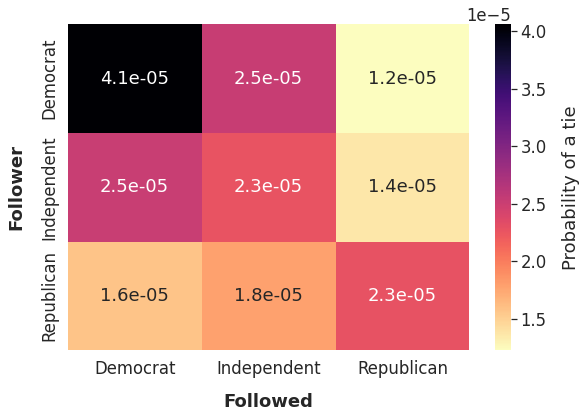

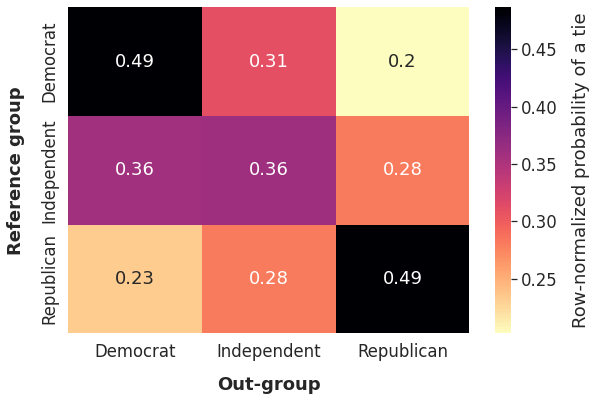

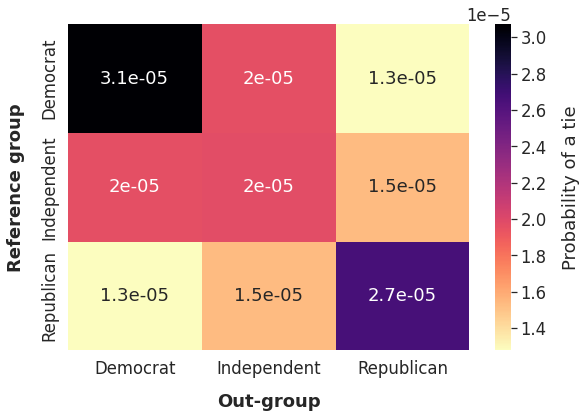

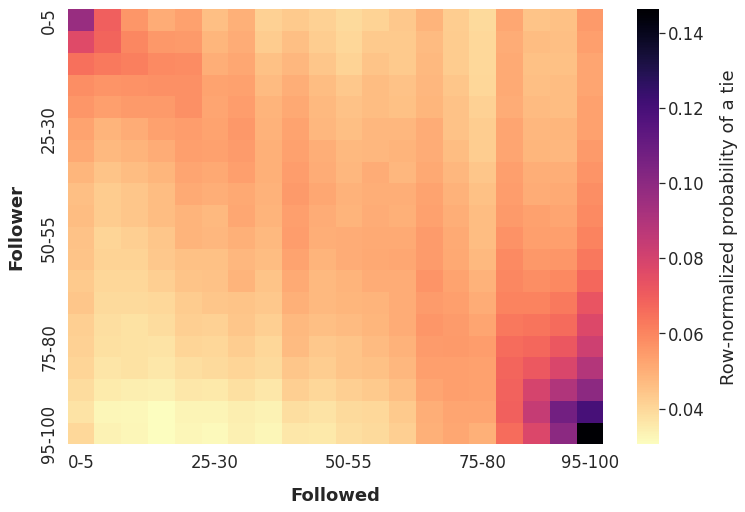

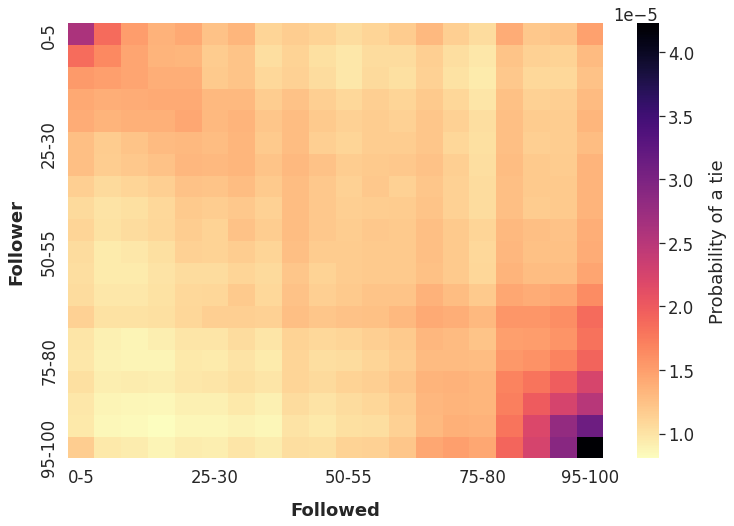

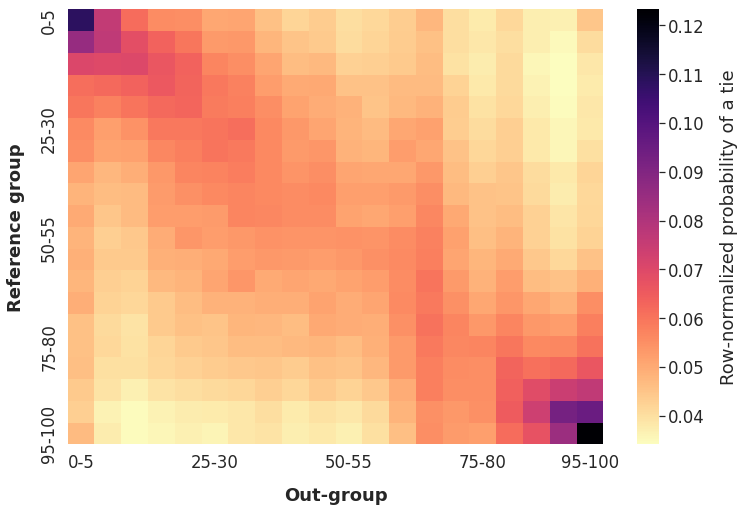

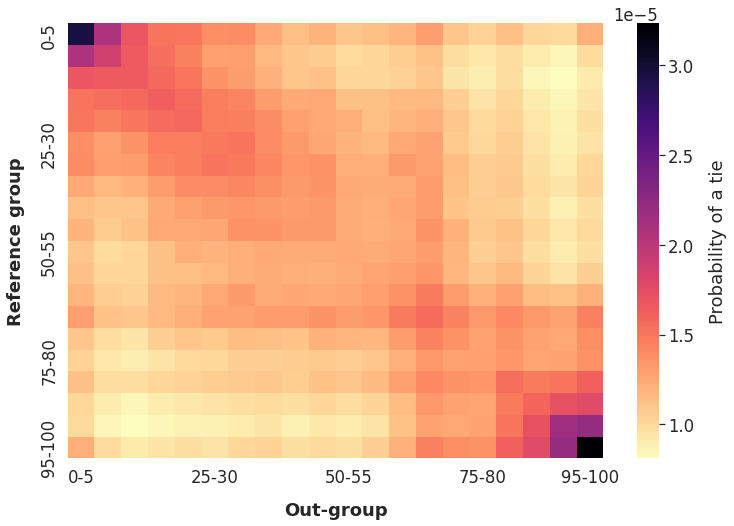

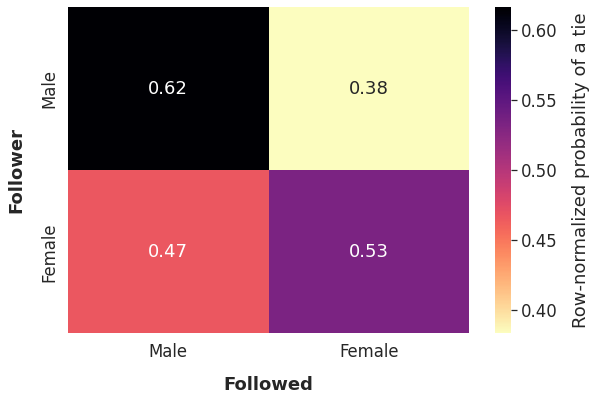

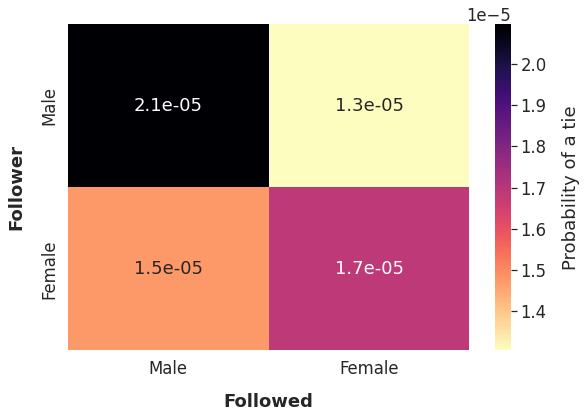

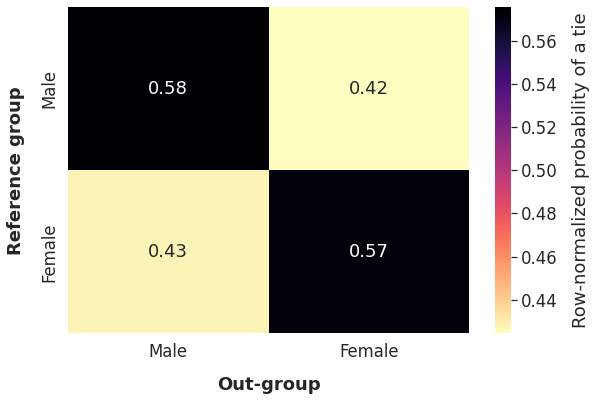

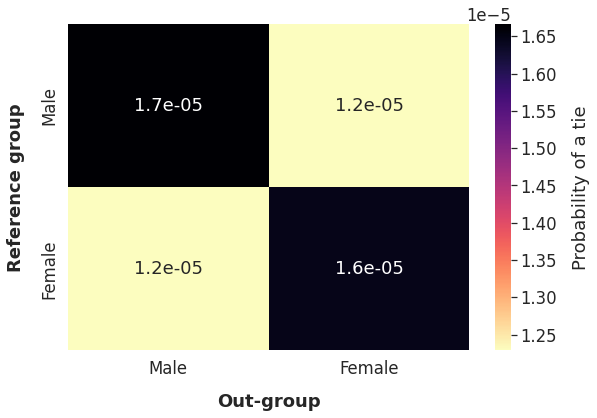

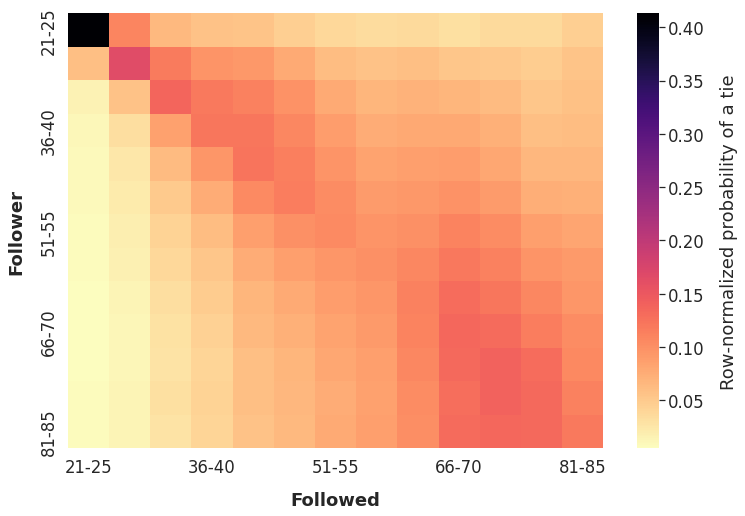

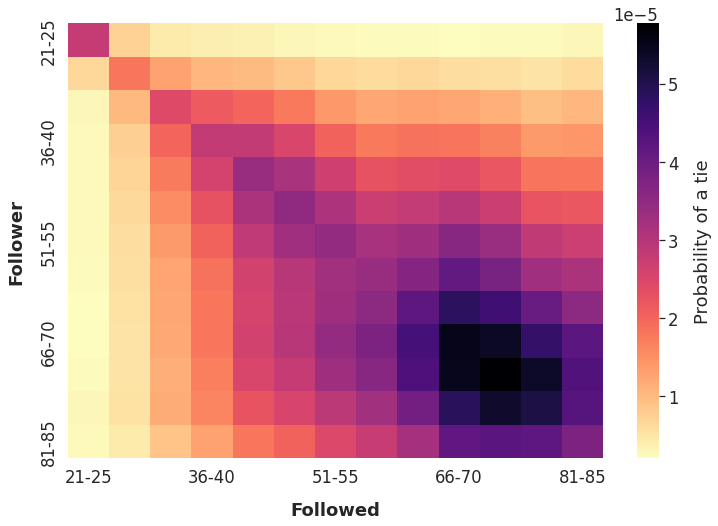

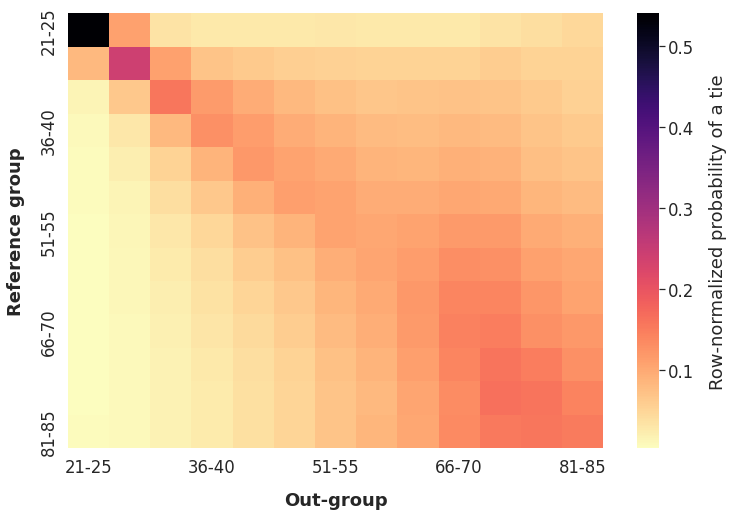

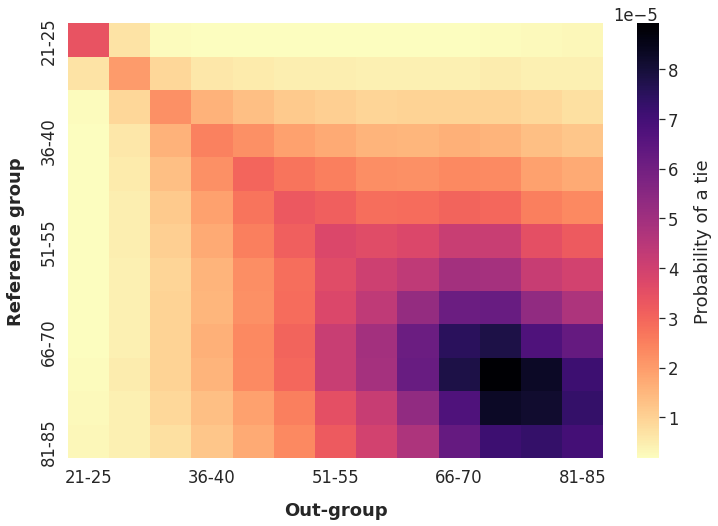

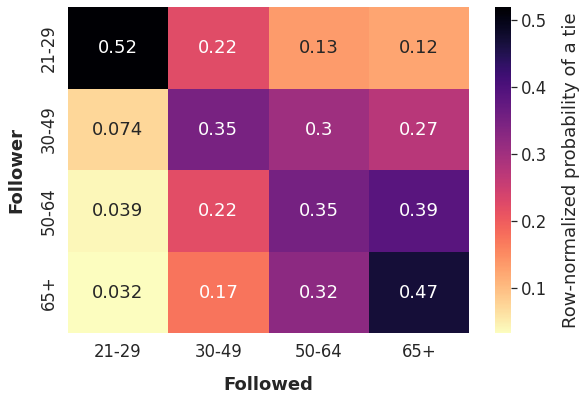

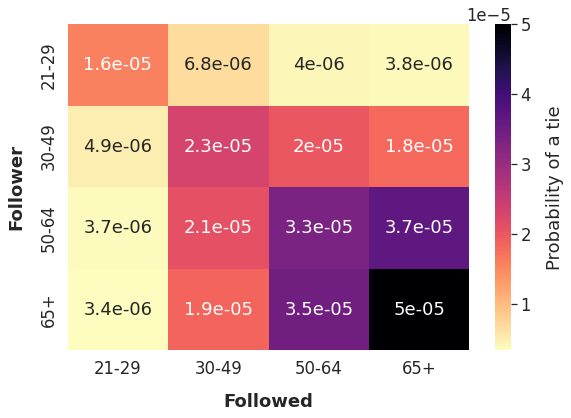

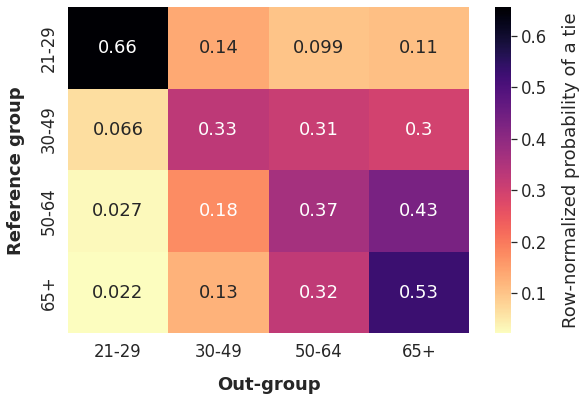

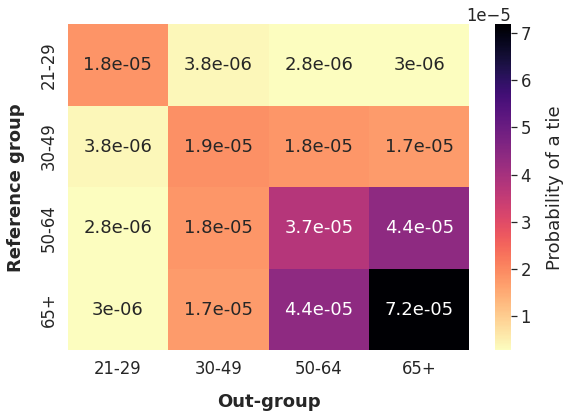

In [17]:
plt.ion()

variable = "binned_age"
col_names= ['18-29','30-49','50-64','65+']
ticks = ['21-29','30-49','50-64','65+']
age = fn.get_table(fn.diadic_density(variable, G)[0])
age_rec = fn.get_table(fn.diadic_density(variable, H, reciprocal=True)[0], reciprocal = True)
gen_all_heatmaps(age, age_rec, variable, col_names,  annotate = True, ticks = ticks)

100%|███████████████████████████████████████████████████████████████████████████████| 3838473/3838473 [00:13<00:00, 286318.53it/s]


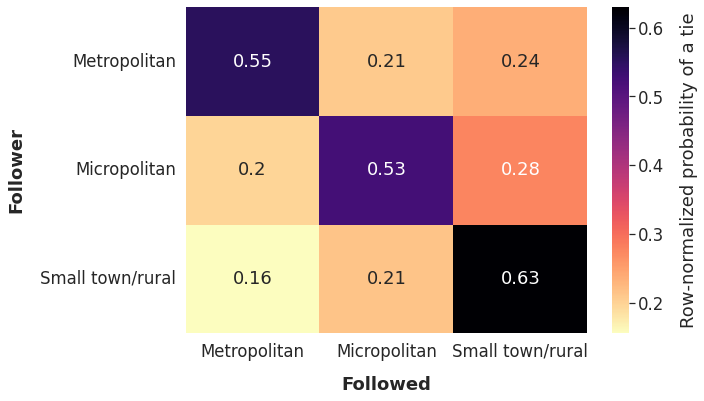

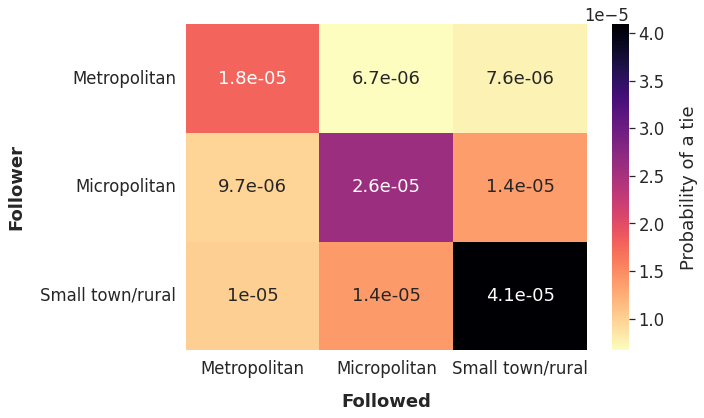

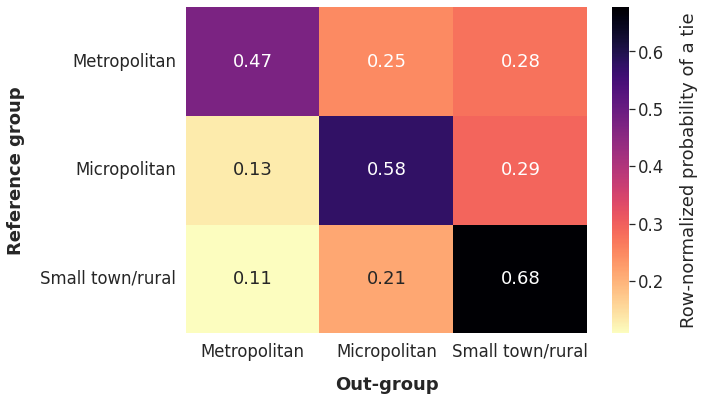

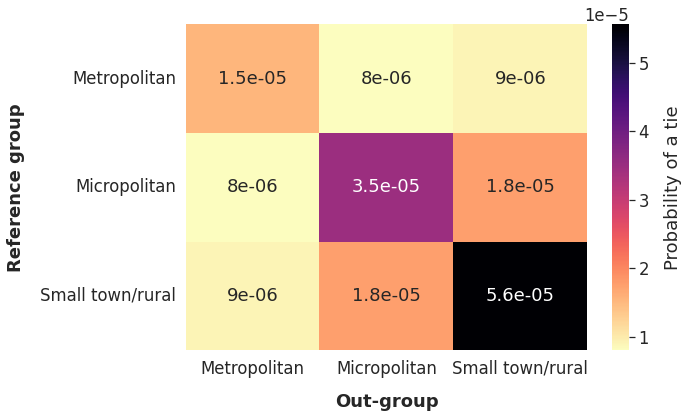

In [18]:
variable = "ruca_urbanicity"
col_names= ["metropolitan", "micropolitan", "small_town/rural"]
ruca = fn.get_table(fn.diadic_density(variable, G)[0])
ruca_rec = fn.get_table(fn.diadic_density(variable, H, reciprocal = True)[0], reciprocal = True)
gen_all_heatmaps(ruca, ruca_rec, variable, col_names, ticks = ["Metropolitan", "Micropolitan", "Small town/rural"])

100%|███████████████████████████████████████████████████████████████████████████████| 3834291/3834291 [00:13<00:00, 289214.29it/s]


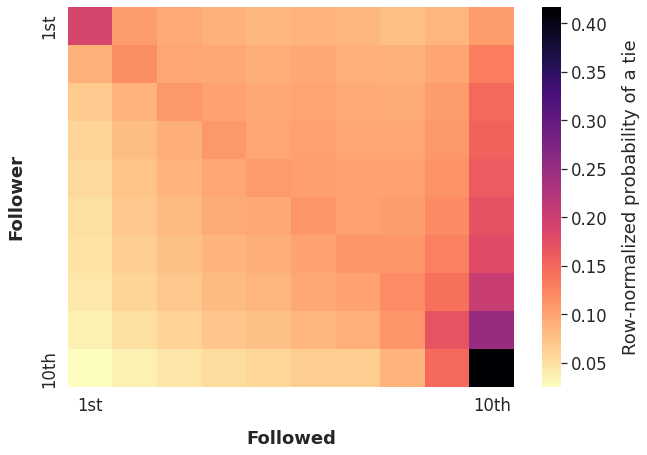

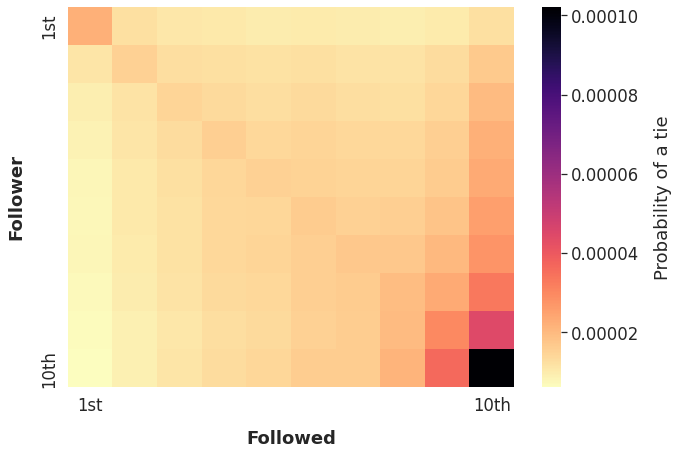

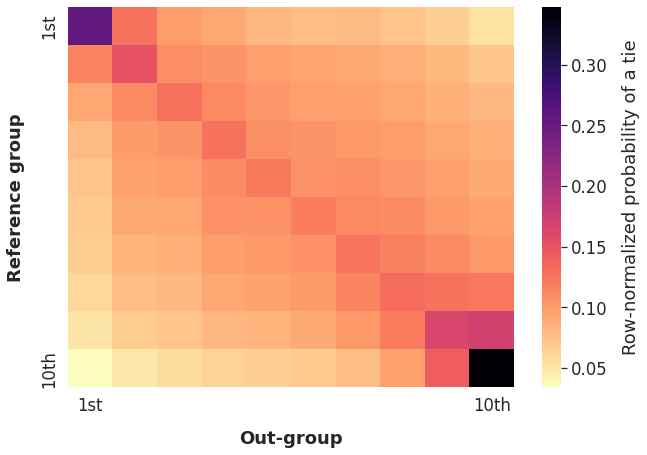

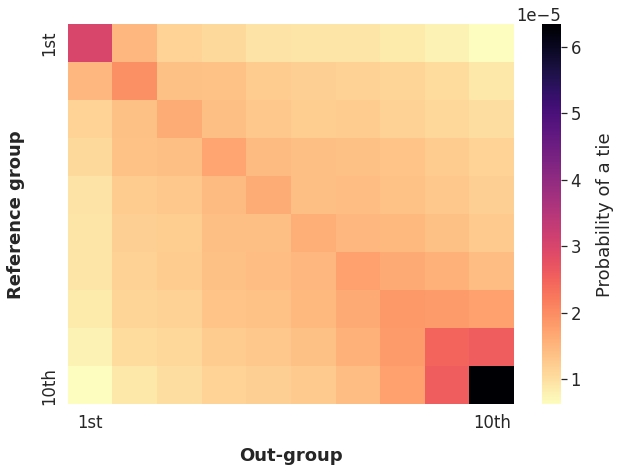

In [19]:
variable = "density_deciles"
col_names= ["0-10","10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100"]
ticks = ["1st"," ", " ", " ", " ", " ", " ", " ", " ", "10th"]
density = fn.get_table(fn.diadic_density(variable, G)[0])
density_rec = fn.get_table(fn.diadic_density(variable, H, reciprocal = True)[0], reciprocal = True)
gen_all_heatmaps(density, density_rec, variable, col_names, (10,7), annotate = False, ticks=ticks)

## Activity and Popularity controlled homophily

In [4]:
def get_freq_hom(attr, net = G):
    (dens, cnt_pairs, cnt_ties) = fn.diadic_density(attr, net)
    cnt_no_tie = {key:(val-cnt_ties[key]) for key,val in cnt_pairs.items()}   
    
    rows = [None for i in range(len(cnt_ties) + len(cnt_no_tie))]
    i = 0
    for key,val in cnt_ties.items():
        if key[0] == key[1]:
            Hom = key[0]
        if key[0] != key[1]:
            Hom = 0
        rows[i] = [key[0], key[1], 1, val, Hom]  
        i +=1

    for key,val in cnt_no_tie.items():
        if key[0] == key[1]:
            Hom = key[0]
        if key[0] != key[1]:
            Hom = 0
        rows[i] = [key[0], key[1], 0, val, Hom]  
        i +=1

    df = pd.DataFrame(rows, columns = ["Ego", "Alter", "Tie", "Freq", "Hom"])    
    return(df)

In [30]:
def get_mod_coefs(tab, r = 2):
    mod = smf.glm("Tie ~ C(Hom)", data = tab, family = sm.families.Binomial(), freq_weights = tab.Freq)
    res = mod.fit()
    CI = np.exp((res.conf_int()))
    CI1 = CI[1]-CI[0]
    t1 = np.exp(res.params)
    
    mod = smf.glm("Tie ~ C(Ego) + C(Hom)", data = tab, family = sm.families.Binomial(), freq_weights = tab.Freq)
    res = mod.fit()
    CI = np.exp((res.conf_int()))
    CI2 = CI[1]-CI[0]
    t2 = np.exp(res.params)
    
    mod = smf.glm("Tie ~ C(Alter) + C(Hom)", data = tab, family = sm.families.Binomial(), freq_weights = tab.Freq)
    res = mod.fit()
    CI = np.exp((res.conf_int()))
    CI3 = CI[1]-CI[0]
    t3 = np.exp(res.params)
    
    mod = smf.glm("Tie ~ C(Ego) + C(Alter) + C(Hom)", data = tab, family = sm.families.Binomial(), freq_weights = tab.Freq)
    res = mod.fit()
    CI = np.exp((res.conf_int()))
    CI4 = CI[1]-CI[0]
    t4 = np.exp(res.params)
    
    out = pd.concat([t1,t2,t3,t4], axis=1).round(2)  
    CI_out = pd.concat([CI1, CI2, CI3, CI4], axis = 1).round(4)
    return(out, CI_out)

Partisanship

In [6]:
party_df = get_freq_hom("party_id")

100%|███████████████████████████████████████████████████████████████████████████████| 17547086/17547086 [00:36<00:00, 476218.17it/s]


In [12]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    Tie   No. Observations:                   18
Model:                            GLM   Df Residuals:            1105142331298
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.1018e+08
Date:                Mon, 13 Jan 2025   Deviance:                   4.2036e+08
Time:                        05:50:46   Pearson chi2:                 1.11e+12
No. Iterations:                    24   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -11.3278      0.001  -8573.454      0.000     -11.330     -11.325
C(Ego)[T.Independent]       0.0952      0.001     75.318      0.000       0.093       0.098
C(Ego)[T.Republican]        0.0405      0.001     30.871      0.000       0.038       0.043
C(Alter)[T.Independent]    -0.1152      0.001    -92.955      0.000      -0.118      -0.113
C(Alter)[T.Republican]     -0.2114      0.001   -161.873      0.000      -0.214      -0.209
C(Hom)[T.Democrat]          0.7407      0.001    541.512      0.000       0.738       0.743
C(Hom)[T.Independent]       0.0030      0.003      1.184      0.236      -0.002       0.008
C(Hom)[T.Republican]        0.4771      0.001    319.384      0.000       0.474       0.480
===========================================================================================
"""

In [26]:
CI = np.exp((res.conf_int()))
CI[1]-CI[0]

Intercept                  6.232426e-08
C(Ego)[T.Independent]      5.449769e-03
C(Ego)[T.Republican]       5.361441e-03
C(Alter)[T.Independent]    4.329164e-03
C(Alter)[T.Republican]     4.143104e-03
C(Hom)[T.Democrat]         1.124531e-02
C(Hom)[T.Independent]      9.948900e-03
C(Hom)[T.Republican]       9.436675e-03
dtype: float64

In [22]:
np.exp(res.bse*1.96) * np.exp(0.0030)


Intercept                  1.005605
C(Ego)[T.Independent]      1.005493
C(Ego)[T.Republican]       1.005590
C(Alter)[T.Independent]    1.005444
C(Alter)[T.Republican]     1.005575
C(Hom)[T.Democrat]         1.005697
C(Hom)[T.Independent]      1.007991
C(Hom)[T.Republican]       1.005946
dtype: float64

In [24]:
np.exp(0.0030) / np.exp(res.bse*1.96) 


Intercept                  1.000410
C(Ego)[T.Independent]      1.000523
C(Ego)[T.Republican]       1.000426
C(Alter)[T.Independent]    1.000571
C(Alter)[T.Republican]     1.000441
C(Hom)[T.Democrat]         1.000319
C(Hom)[T.Independent]      0.998042
C(Hom)[T.Republican]       1.000072
dtype: float64

In [25]:
np.exp(0.0030)

np.float64(1.003004504503377)

In [32]:
out = get_mod_coefs(party_df)
out[0]

,0,1,2,3
Intercept,0.00,0.00,0.00,0.00
C(Hom)[T.Democrat],2.23,2.52,1.98,2.10
C(Hom)[T.Independent],1.05,0.96,1.09,1.00
C(Hom)[T.Republican],1.45,1.33,1.65,1.61
C(Ego)[T.Independent],NaN,1.22,NaN,1.10
C(Ego)[T.Republican],NaN,1.23,NaN,1.04
C(Alter)[T.Independent],NaN,NaN,0.86,0.89
C(Alter)[T.Republican],NaN,NaN,0.78,0.81


In [33]:
out[1]

,0,1,2,3
Intercept,0.0000,0.0000,0.0000,0.0000
C(Hom)[T.Democrat],0.0045,0.0069,0.0050,0.0112
C(Hom)[T.Independent],0.0090,0.0087,0.0099,0.0099
C(Hom)[T.Republican],0.0045,0.0047,0.0061,0.0094
C(Ego)[T.Independent],NaN,0.0049,NaN,0.0054
C(Ego)[T.Republican],NaN,0.0040,NaN,0.0054
C(Alter)[T.Independent],NaN,NaN,0.0034,0.0043
C(Alter)[T.Republican],NaN,NaN,0.0025,0.0041


Party Registration

In [34]:
party_reg_df = get_freq_hom("party_reg")

100%|█████████████████████████████████████████████████████████████████████████████████| 8586229/8586229 [00:19<00:00, 445736.84it/s]


In [37]:
out = get_mod_coefs(party_reg_df)
out[0] = out[0].loc[~out[0].index.str.contains("Other")]
out[0]

,0,1,2,3
Intercept,0.00,0.00,0.00,0.00
C(Hom)[T.Democrat],2.14,2.12,1.95,1.75
C(Hom)[T.Independent],1.20,1.09,1.01,0.83
C(Hom)[T.Republican],1.21,1.38,1.78,2.65
C(Ego)[T.Independent],NaN,1.09,NaN,1.08
C(Ego)[T.Republican],NaN,0.86,NaN,0.69
C(Alter)[T.Independent],NaN,NaN,1.08,1.09
C(Alter)[T.Republican],NaN,NaN,0.62,0.54


In [39]:
out[1] = out[1].loc[~out[1].index.str.contains("Other")]
out[1]

,0,1,2,3
Intercept,0.0000,0.0000,0.0000,0.0000
C(Hom)[T.Democrat],0.0063,0.0080,0.0072,0.0111
C(Hom)[T.Independent],0.0063,0.0064,0.0059,0.0064
C(Hom)[T.Republican],0.0068,0.0089,0.0120,0.0215
C(Ego)[T.Independent],NaN,0.0048,NaN,0.0064
C(Ego)[T.Republican],NaN,0.0041,NaN,0.0039
C(Alter)[T.Independent],NaN,NaN,0.0045,0.0062
C(Alter)[T.Republican],NaN,NaN,0.0031,0.0031


Sex

In [43]:
sex_df = get_freq_hom("gender")
sex_df_hom = sex_df.copy(deep = False)
sex_df_hom["Hom"] = sex_df_hom.Hom.apply(lambda x: 1 if x!=0 else 0)

100%|███████████████████████████████████████████████████████████████████████████████| 17547086/17547086 [00:41<00:00, 425152.49it/s]


In [44]:
get_mod_coefs(sex_df)

/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.12/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


[                     0     1     2    3
 Intercept         0.00  0.00  0.00  0.0
 C(Hom)[T.Female]  1.21  1.14  1.29  0.0
 C(Hom)[T.Male]    1.51  1.61  1.42  inf
 C(Ego)[T.Male]     NaN  0.88   NaN  0.0
 C(Alter)[T.Male]   NaN   NaN  1.13  0.0,
                        0       1       2    3
 Intercept         0.0000  0.0000  0.0000  0.0
 C(Hom)[T.Female]  0.0027  0.0030  0.0035  0.0
 C(Hom)[T.Male]    0.0036  0.0046  0.0039  NaN
 C(Ego)[T.Male]       NaN  0.0026     NaN  0.0
 C(Alter)[T.Male]     NaN     NaN  0.0033  0.0]

In [45]:
get_mod_coefs(sex_df_hom)

[                     0     1     2     3
 Intercept         0.00  0.00  0.00  0.00
 C(Hom)[T.1]       1.33  1.34  1.35  1.36
 C(Ego)[T.Male]     NaN  1.07   NaN  1.05
 C(Alter)[T.Male]   NaN   NaN  1.19  1.19,
                        0       1       2       3
 Intercept         0.0000  0.0000  0.0000  0.0000
 C(Hom)[T.1]       0.0026  0.0026  0.0026  0.0026
 C(Ego)[T.Male]       NaN  0.0021     NaN  0.0020
 C(Alter)[T.Male]     NaN     NaN  0.0023  0.0023]

Race

In [46]:
race_df = get_freq_hom("race")

100%|███████████████████████████████████████████████████████████████████████████████| 17547086/17547086 [00:40<00:00, 436720.94it/s]


In [47]:
mod = smf.glm("Tie ~ C(Hom)", 
              data = race_df, family = sm.families.Binomial(), freq_weights = race_df.Freq)
res = mod.fit()
CI = np.exp((res.conf_int()))
CI1 = CI[1]-CI[0]
t1 = np.exp(res.params)

mod = smf.glm("Tie ~ C(Ego, Treatment(reference = 'Caucasian')) + C(Hom)", 
              data = race_df, family = sm.families.Binomial(), freq_weights = race_df.Freq)
res = mod.fit()
CI = np.exp((res.conf_int()))
CI2 = CI[1]-CI[0]
t2 = np.exp(res.params)

mod = smf.glm("Tie ~ C(Alter, Treatment(reference = 'Caucasian')) + C(Hom)", 
              data = race_df, family = sm.families.Binomial(), freq_weights = race_df.Freq)
res = mod.fit()
CI = np.exp((res.conf_int()))
CI3 = CI[1]-CI[0]
t3 = np.exp(res.params)

mod = smf.glm("Tie ~ C(Ego, Treatment(reference = 'Caucasian')) + C(Alter, Treatment(reference = 'Caucasian')) + C(Hom)", 
              data = race_df, family = sm.families.Binomial(), freq_weights = race_df.Freq)
res = mod.fit()
CI = np.exp((res.conf_int()))
CI4 = CI[1]-CI[0]
t4 = np.exp(res.params)

out = pd.concat([t1,t2,t3,t4], axis=1).round(2)
CI_out = pd.concat([CI1, CI2, CI3, CI4], axis = 1).round(4)
out = out.loc[~(out.index.str.contains("Other") | out.index.str.contains("Native"))]
out

,0,1,2,3
Intercept,0.00,0.00,0.00,0.00
C(Hom)[T.African-American],3.73,3.86,3.71,4.27
C(Hom)[T.Asian],6.45,4.51,4.24,3.20
C(Hom)[T.Caucasian],1.61,1.63,1.58,1.43
C(Hom)[T.Hispanic],2.38,2.73,3.42,4.39
"C(Ego, Treatment(reference='Caucasian'))[T.African-American]",NaN,0.98,NaN,0.87
"C(Ego, Treatment(reference='Caucasian'))[T.Asian]",NaN,1.44,NaN,1.30
"C(Ego, Treatment(reference='Caucasian'))[T.Hispanic]",NaN,0.88,NaN,0.78
"C(Alter, Treatment(reference='Caucasian'))[T.African-American]",NaN,NaN,0.99,0.89
"C(Alter, Treatment(reference='Caucasian'))[T.Asian]",NaN,NaN,1.49,1.37


In [48]:
CI_out = CI_out.loc[~(CI_out.index.str.contains("Other") | CI_out.index.str.contains("Native"))]
CI_out

,0,1,2,3
Intercept,0.0000,0.0000,0.0000,0.0000
C(Hom)[T.African-American],0.0320,0.0364,0.0348,0.0648
C(Hom)[T.Asian],0.1585,0.1151,0.1078,0.0906
C(Hom)[T.Caucasian],0.0042,0.0058,0.0056,0.0178
C(Hom)[T.Hispanic],0.0460,0.0551,0.0700,0.1042
"C(Ego, Treatment(reference='Caucasian'))[T.African-American]",NaN,0.0056,NaN,0.0109
"C(Ego, Treatment(reference='Caucasian'))[T.Asian]",NaN,0.0115,NaN,0.0174
"C(Ego, Treatment(reference='Caucasian'))[T.Hispanic]",NaN,0.0064,NaN,0.0101
"C(Alter, Treatment(reference='Caucasian'))[T.African-American]",NaN,NaN,0.0055,0.0112
"C(Alter, Treatment(reference='Caucasian'))[T.Asian]",NaN,NaN,0.0116,0.0182


Race VRA

In [32]:
states = {'AL', 'GA', 'LA', 'MS', 'SC', 'VA', 'AK', 'AZ','TX', 'NC'}
state_nodes = [n[0] for n in G.nodes('state') if n[1] in states]
sub_graph = G.subgraph(state_nodes).copy()

race_vra_df = get_freq_hom("race", sub_graph)

100%|███████████████████████████████████████████████████████████████████████████████| 1381610/1381610 [00:03<00:00, 386883.50it/s]


In [33]:
mod = smf.glm("Tie ~ C(Hom)", 
              data = race_vra_df, family = sm.families.Binomial(), freq_weights = race_vra_df.Freq)
res = mod.fit()
#print(res.summary())
t1 = np.exp(res.params)

mod = smf.glm("Tie ~ C(Ego, Treatment(reference = 'Caucasian')) + C(Hom)", 
              data = race_vra_df, family = sm.families.Binomial(), freq_weights = race_vra_df.Freq)
res = mod.fit()
#print(res.summary())
t2 = np.exp(res.params)

mod = smf.glm("Tie ~ C(Alter, Treatment(reference = 'Caucasian')) + C(Hom)", 
              data = race_vra_df, family = sm.families.Binomial(), freq_weights = race_vra_df.Freq)
res = mod.fit()
#print(res.summary())
t3 = np.exp(res.params)

mod = smf.glm("Tie ~ C(Ego, Treatment(reference = 'Caucasian')) + C(Alter, Treatment(reference = 'Caucasian')) + C(Hom)", 
              data = race_vra_df, family = sm.families.Binomial(), freq_weights = race_vra_df.Freq)
res = mod.fit()
#print(res.summary())
t4 = np.exp(res.params)

out = pd.concat([t1,t2,t3,t4], axis=1).round(2)
out = out.loc[~(out.index.str.contains("Other") | out.index.str.contains("Native"))]
out

,0,1,2,3
Intercept,0.00,0.00,0.00,0.00
C(Hom)[T.African-American],4.46,4.68,4.95,7.17
C(Hom)[T.Asian],12.85,8.98,9.21,8.06
C(Hom)[T.Caucasian],1.94,1.98,1.84,1.36
C(Hom)[T.Hispanic],3.66,3.57,4.17,5.24
"C(Ego, Treatment(reference='Caucasian'))[T.African-American]",NaN,0.98,NaN,0.68
"C(Ego, Treatment(reference='Caucasian'))[T.Asian]",NaN,1.46,NaN,1.08
"C(Ego, Treatment(reference='Caucasian'))[T.Hispanic]",NaN,1.05,NaN,0.76
"C(Alter, Treatment(reference='Caucasian'))[T.African-American]",NaN,NaN,0.86,0.64
"C(Alter, Treatment(reference='Caucasian'))[T.Asian]",NaN,NaN,1.33,1.04


# Population in radius and distance

In [73]:
rand_pop = pk.load(open("../Pickles/radiation_pop_rand_labels.pk", "rb"))

In [74]:
tie_pop = nx.get_edge_attributes(G, "radiation_pop")
tie_pop = {k:v for k,v in tie_pop.items() if not v==None}

In [75]:
len(rand_pop)

17408552

In [76]:
len(tie_pop)

17543183

In [77]:
max(rand_pop.values())

312471157

In [78]:
max(tie_pop.values())

312471327

In [84]:
def calculate_dens(rand_pop, tie_pop, G, bins = 20, directed = True, min_pop_log = 2):
    max_pop = max(max(rand_pop.values()), max(tie_pop.values())) + 10
    log_space = np.logspace(min_pop_log, np.log10(max_pop), bins, base = 10)
    bins_log = [(log_space[i], log_space[i+1]) for i in range(len(log_space)-1)]
    
    rand_pop_bin_log = fn.bin_distance(rand_pop, bins_log)
    tie_pop_bin_log = fn.bin_distance(tie_pop, bins_log)    
    factor = len(G)*len(G)/len(rand_pop) if directed else len(G)*len(G)/(len(rand_pop)*2)

    cnt_rand_log = {key:(val*factor) for key,val in rand_pop_bin_log[1].items()}
    cnt_ties_log = tie_pop_bin_log[1]
    dens_log = {key:(cnt_ties_log[key]/val)/2 for key,val in cnt_rand_log.items() if val>0}
    
    return(dens_log)

In [89]:
dens_log = calculate_dens(rand_pop, tie_pop, G, 800, min_pop_log = 3)

In [90]:
dens_log2 = calculate_dens(rand_pop, tie_pop, G, 15, min_pop_log = 3)

In [91]:
import matplotlib.style
import matplotlib as mpl
plt.style.use("default")

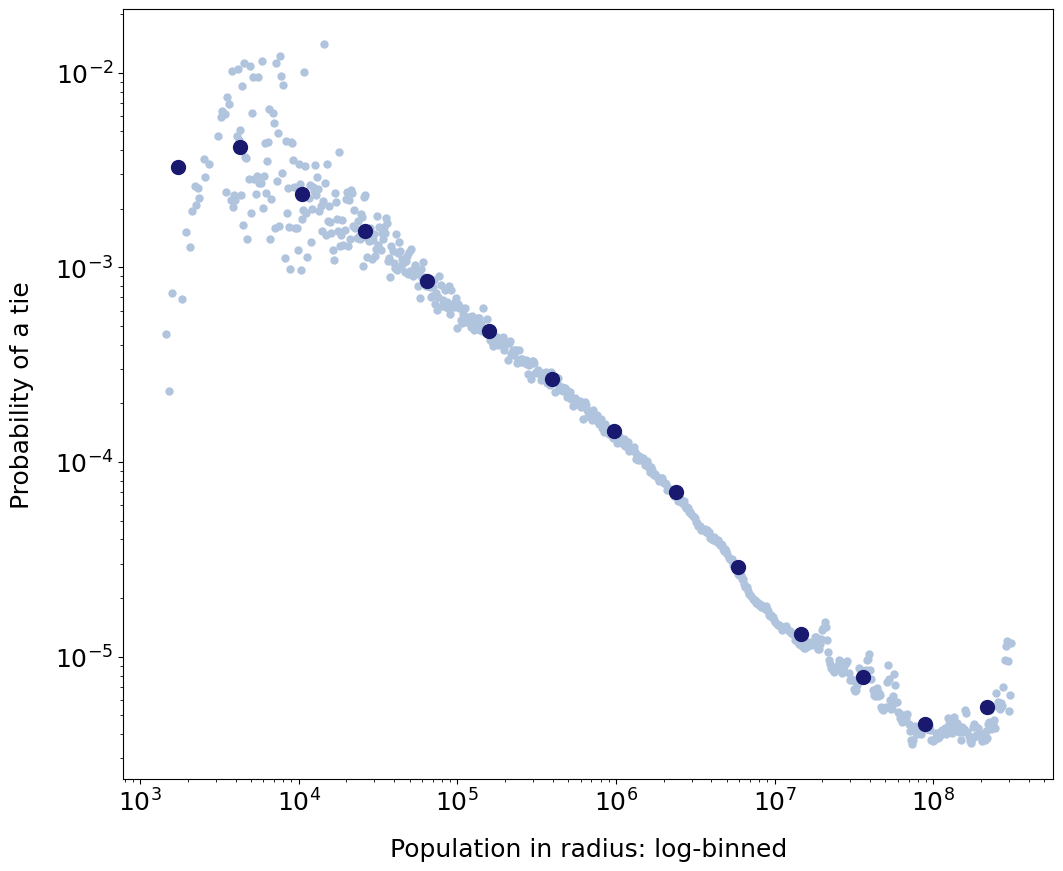

In [92]:
plt.rcParams.update({'font.size': 18})

plt.figure(figsize = (12,10))
plt.loglog(list([(x[0]+x[1])/2 for x in dens_log.keys()]), list(dens_log.values()), '.', markersize = 10, color = "lightsteelblue")
plt.loglog(list([(x[0]+x[1])/2 for x in dens_log2.keys()]), list(dens_log2.values()), '.', markersize = 20, color = "midnightblue")

plt.ylabel("Probability of a tie", labelpad = 15)
plt.xlabel("Population in radius: log-binned", labelpad = 15)

#plt.ylim((1e-6 , 0.02))
plt.savefig('Plots/Bivariate/pop_radius_directed.png',bbox_inches='tight', dpi=200, facecolor = "white")

### Undirected network

In [45]:
tie_pop_und = nx.get_edge_attributes(H, "radiation_pop")
tie_pop_und = {k:v for k,v in tie_pop_und.items() if not v==None}

In [46]:
nodes_rec = set(H.nodes())
rand_pop_und = {dyad:val for dyad,val in tqdm(rand_pop.items()) if dyad[0] in nodes_rec and dyad[1] in nodes_rec}

100%|████████████████████████████████████████████████████████████████████████████| 17408552/17408552 [00:17<00:00, 1008423.95it/s]


In [69]:
len(tie_pop_und)

3838647

In [70]:
len(list(rand_pop_und.keys()))

8326294

In [71]:
dens_log_und = calculate_dens(rand_pop_und, tie_pop_und, H, 1000, False)
dens_log2_und = calculate_dens(rand_pop_und, tie_pop_und, H, 20, False)

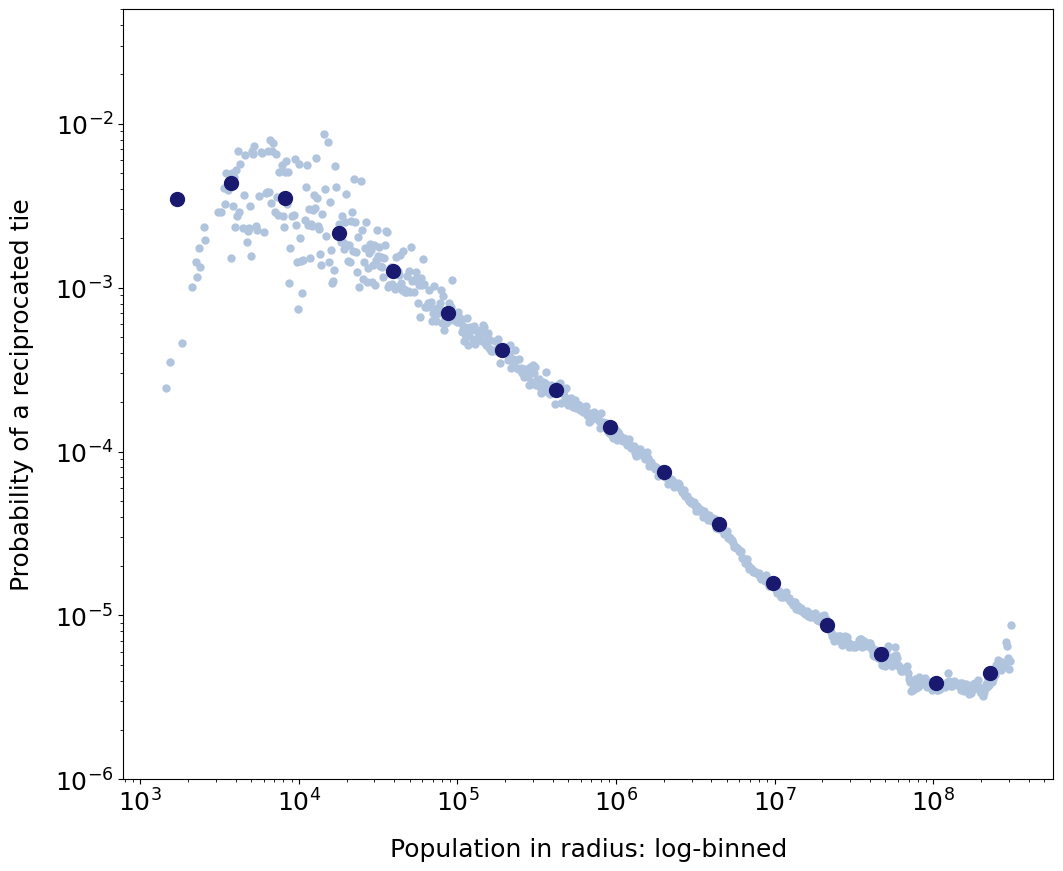

In [50]:
plt.rcParams.update({'font.size': 18})

plt.figure(figsize = (12,10))
plt.loglog(list([(x[0]+x[1])/2 for x in dens_log_und.keys()]), list(dens_log_und.values()), '.', markersize = 10, color = "lightsteelblue")
plt.loglog(list([(x[0]+x[1])/2 for x in dens_log2_und.keys()]), list(dens_log2_und.values()), '.', markersize = 20, color = "midnightblue")

plt.ylabel("Probability of a reciprocated tie", labelpad = 15)
plt.xlabel("Population in radius: log-binned", labelpad = 15)

plt.ylim((1e-6 , 0.05))
plt.savefig('Plots/Bivariate/pop_radius_reciprocal.png',bbox_inches='tight', dpi=300, facecolor = "white")

In [51]:
dens_log_und_norm = {key:(val/sum(dens_log_und.values())) for key,val in dens_log_und.items()}
dens_log2_und_norm = {key:(val/sum(dens_log2_und.values())) for key,val in dens_log2_und.items()}

dens_log_norm = {key:(val/sum(dens_log.values())) for key,val in dens_log.items()}
dens_log2_norm = {key:(val/sum(dens_log2.values())) for key,val in dens_log2.items()}


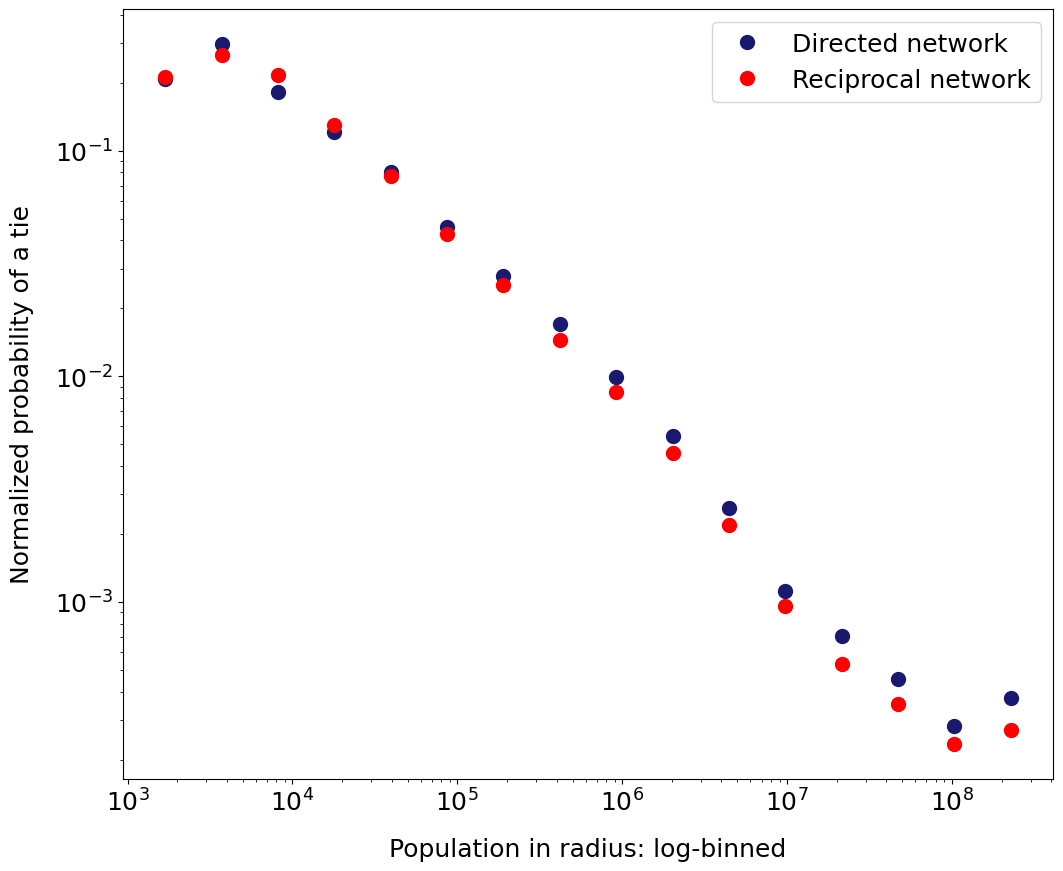

In [52]:
plt.style.use("default")

plt.rcParams.update({'font.size': 18})

plt.figure(figsize = (12,10))

plt.loglog(list([(x[0]+x[1])/2 for x in dens_log2_norm.keys()]), list(dens_log2_norm.values()), '.', markersize = 20, color = "midnightblue", label = "Directed network")
plt.loglog(list([(x[0]+x[1])/2 for x in dens_log2_und_norm.keys()]), list(dens_log2_und_norm.values()), '.', markersize = 20, color = "red", label = "Reciprocal network")

plt.legend()
plt.ylabel("Normalized probability of a tie", labelpad = 15)
plt.xlabel("Population in radius: log-binned", labelpad = 15)

#plt.ylim((1e-6 , 0.02))

plt.savefig('Plots/Bivariate/pop_radius_comparison_big.png',bbox_inches='tight', dpi=200, facecolor = "white")

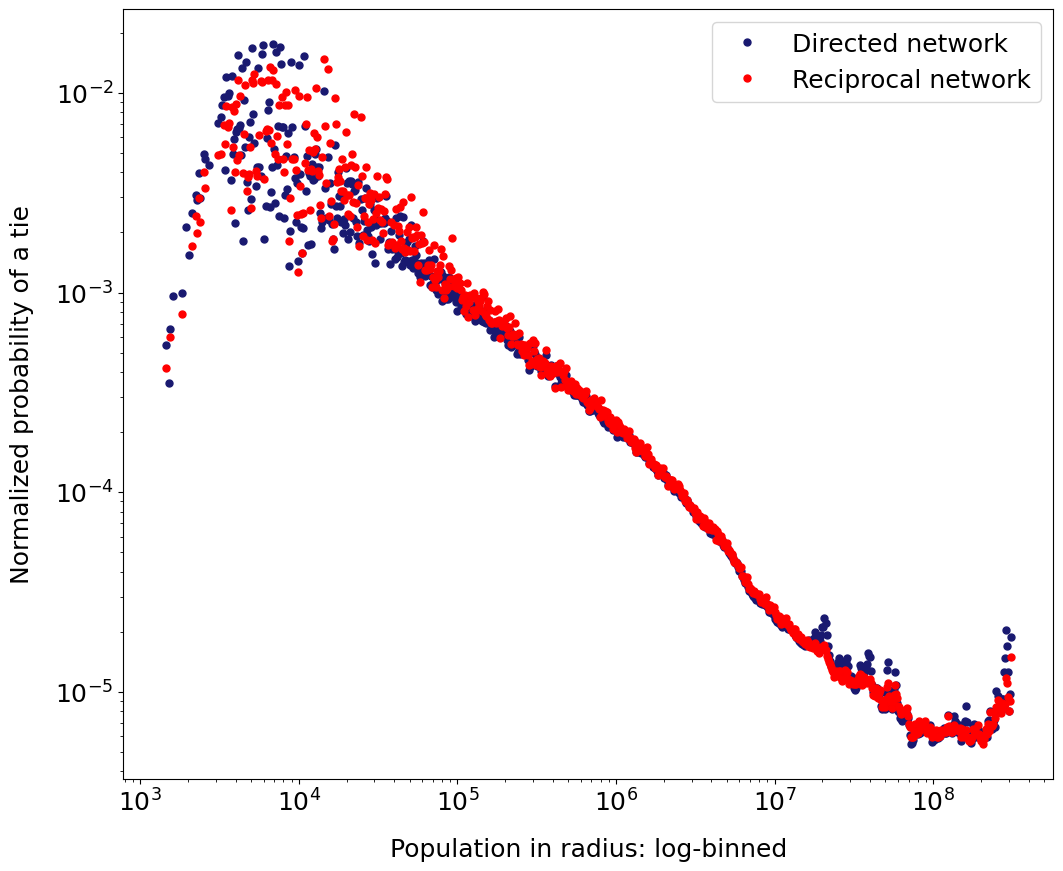

In [53]:
plt.style.use("default")

plt.rcParams.update({'font.size': 18})

plt.figure(figsize = (12,10))

plt.loglog(list([(x[0]+x[1])/2 for x in dens_log_norm.keys()]), list(dens_log_norm.values()), '.', markersize = 10, color = "midnightblue", label = "Directed network")
#plt.loglog(list([(x[0]+x[1])/2 for x in dens_log2_norm.keys()]), list(dens_log2_norm.values()), '.', markersize = 20, color = "midnightblue", label = "Directed network")

plt.loglog(list([(x[0]+x[1])/2 for x in dens_log_und_norm.keys()]), list(dens_log_und_norm.values()), '.', markersize = 10, color = "red", label = "Reciprocal network")
#plt.loglog(list([(x[0]+x[1])/2 for x in dens_log2_und_norm.keys()]), list(dens_log2_und_norm.values()), '.', markersize = 20, color = "red", label = "Reciprocal network")

plt.legend()
plt.ylabel("Normalized probability of a tie", labelpad = 15)
plt.xlabel("Population in radius: log-binned", labelpad = 15)
#plt.title("Probability of a tie by population between users, log-log scale");
plt.savefig('Plots/Bivariate/pop_radius_comparison_small.png',bbox_inches='tight', dpi=300)

### In text numbers

In [165]:
rand_pop_custom_bin = fn.bin_distance(rand_pop, [(1, 1e5), (1e5, 3.5e9)])
rand_pop_custom_bin_und = fn.bin_distance(rand_pop_und, [(1, 1e5), (1e5, 3.5e9)])
tie_pop_custom_bin_und = fn.bin_distance(tie_pop_und, [(1, 1e5), (1e5, 3.5e9)])
tie_pop_custom_bin = fn.bin_distance(tie_pop, [(1, 1e5), (1e5, 3.5e9)])

factor = len(G)*len(G)/len(rand_pop)
factor_und = len(H)*len(H)/len(rand_pop_und)

cnt_rand_custom = {key:(val*factor) for key,val in rand_pop_custom_bin[1].items()}
cnt_rand_custom_und = {key:(val*factor) for key,val in rand_pop_custom_bin_und[1].items()}

cnt_ties_custom_und = tie_pop_custom_bin_und[1]
cnt_ties_custom = tie_pop_custom_bin[1]

dens_custom_und = {key:(cnt_ties_custom_und[key]/val) for key,val in cnt_rand_custom_und.items() if val>0}
dens_custom = {key:(cnt_ties_custom[key]/val)/2 for key,val in cnt_rand_custom.items() if val>0}

In [166]:
dens_custom

{(1, 100000.0): 0.0010821878337754715,
 (100000.0, 3500000000.0): 7.390490716809234e-06}

In [167]:
dens_custom[(1, 100000.0)]/dens_custom[(100000.0, 3500000000.0)]

146.4297670131835

In [97]:
dens_custom_und[(1, 100000.0)]/dens_custom_und[(100000.0, 3500000000.0)]

191.6660742481813

In [159]:
rand_pop_custom_bin = fn.bin_distance(rand_pop, [(1, 1e4), (1e4, 3.5e9)])
tie_pop_custom_bin_und = fn.bin_distance(tie_pop_und, [(1, 1e4), (1e4, 3.5e9)])
tie_pop_custom_bin = fn.bin_distance(tie_pop, [(1, 1e4), (1e4, 3.5e9)])

factor = len(G)*len(G)/len(G.edges())
factor_und = len(H)*len(H)/len(H.edges())

cnt_rand_custom = {key:(val*factor) for key,val in rand_pop_custom_bin[1].items()}
cnt_ties_custom_und = tie_pop_custom_bin_und[1]
cnt_ties_custom = tie_pop_custom_bin[1]

dens_custom_und = {key:(cnt_ties_custom_und[key]/val) for key,val in cnt_rand_custom.items() if val>0}
dens_custom = {key:(cnt_ties_custom[key]/val)/2 for key,val in cnt_rand_custom.items() if val>0}

In [160]:
dens_custom[(1, 10000.0)]/dens_custom[(10000.0, 3500000000.0)]

361.8876408580837

In [161]:
dens_custom_und[(1, 10000.0)]/dens_custom_und[(10000.0, 3500000000.0)]

551.2539078129721

In [94]:
rand_pop_custom_bin2 = fn.bin_distance(rand_pop, [(1, 1e5), (1e5, 1e6), (1e6, 50*1e6), (50*1e6, 340*1e6)])


In [100]:
rand_pop_custom_bin2[1].values()

dict_values([5025, 58274, 2731817, 14613405])

In [102]:
{key: 100*(val)/len(rand_pop) for key,val in rand_pop_custom_bin2[1].items()}

{(1, 100000.0): 0.028865123302615862,
 (100000.0, 1000000.0): 0.3347435214600272,
 (1000000.0, 50000000.0): 15.692384984115852,
 (50000000.0, 340000000.0): 83.94382829772401}

**Distance**

In [56]:
factor = 100
nodes_keep = [node[0] for node in G.nodes(data=True) if not (node[1]["state"] in ['HI', 'AK']) and not pd.isna(node[1]['lat']) and not pd.isna(node[1]['lon'])]
G_flt = G.subgraph(nodes_keep).copy()
random_dist = fn.generate_random_distance(G_flt, len(G_flt)*factor)

100%|████████████████████████████████████████████████████████████████████████████| 104565100/104565100 [49:15<00:00, 35385.77it/s]


In [57]:
pk.dump(random_dist, open("../Pickles/distance_rand.pk", "wb"))

In [24]:
#random_dist = pk.load(open("../Pickles/distance_rand.pk", "rb"))

In [58]:
log_space = np.logspace(1, np.log10(4600), 50, base = 10)
bins_log = [(log_space[i], log_space[i+1]) for i in range(len(log_space)-1)]
dist_density_log = fn.distance_density(G_flt, bins = bins_log, random_dist = random_dist, filtered_G = True)

Length of filtered network =  1045651


In [59]:
plt.style.use("default")

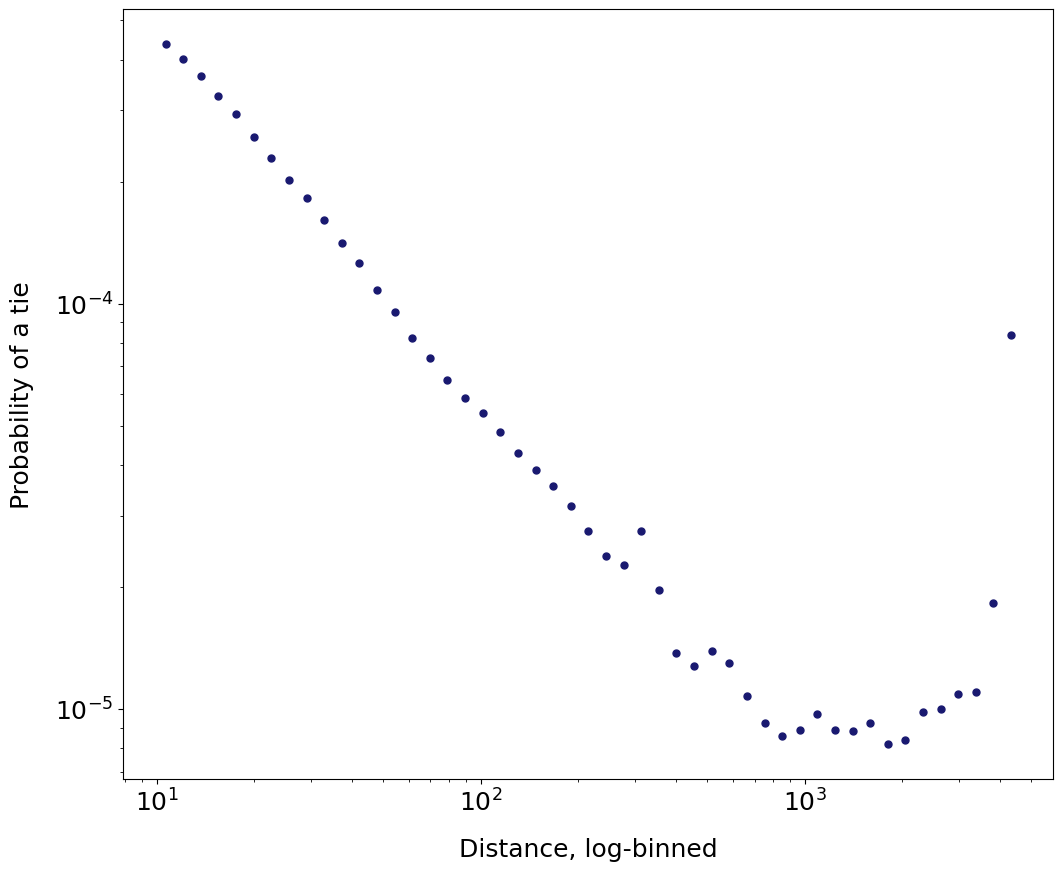

In [60]:
   
plt.rcParams.update({'font.size': 18})
plt.figure(figsize = (12,10))
plt.loglog(list([(x[0]+x[1])/2 for x in dist_density_log.keys()]), list(dist_density_log.values()), '.', markersize = 10, color = "midnightblue")
plt.ylabel("Probability of a tie", labelpad = 15)
plt.xlabel("Distance, log-binned", labelpad = 15)
plt.savefig('Plots/Bivariate/distance_loglog.png',bbox_inches='tight', dpi=200)

In [61]:
dist_custom_bin = fn.bin_distance(random_dist, [(0, 100), (100, 5000)])


In [103]:
dist_custom_bin2 = fn.bin_distance(random_dist, [(0, 20), (20, 100), (100,1000), (1000, 5000)])


In [104]:
{key: 100*(val)/len(random_dist) for key,val in dist_custom_bin2[1].items()}

{(0, 20): 0.475776970658968,
 (20, 100): 1.5607536662685353,
 (100, 1000): 27.62183262862556,
 (1000, 5000): 70.34150857851874}

In [62]:
cnt_rand_custom = {key:(val*(len(G)/factor)) for key,val in dist_custom_bin[1].items()}


In [63]:
import statistics
statistics.median(random_dist.values())

1531.020859168395

In [64]:
len(G)*len(G)

1105143382564

In [65]:
sum(cnt_rand_custom.values())

1099195280699.36

In [66]:
cnt_rand_custom[(0,100)]/sum(cnt_rand_custom.values())

0.02036533246865589

In [67]:
cnt_rand_custom[(100,5000)]/sum(cnt_rand_custom.values())

0.9796346675313441

In [68]:
cnt_rand_custom


{(0, 100): 22385477339.42, (100, 5000): 1076809803359.94}

In [105]:
nx.density(G)

1.587767068814002e-05